<a href="https://colab.research.google.com/github/Roihan21/Visi-Komputer/blob/main/klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


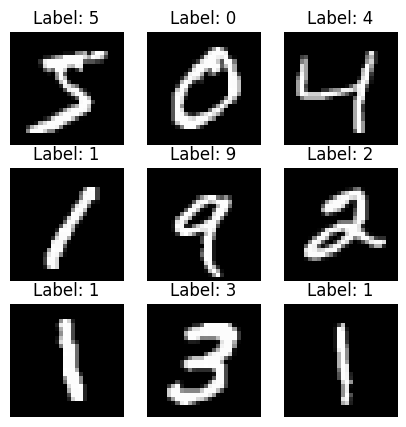

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

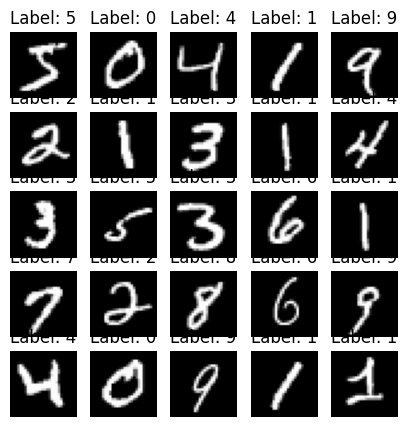

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

D2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#svm
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


D3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.8415 - loss: 0.5676 - val_accuracy: 0.9785 - val_loss: 0.0753
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.9774 - loss: 0.0732 - val_accuracy: 0.9842 - val_loss: 0.0533
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9855 - loss: 0.0483 - val_accuracy: 0.9868 - val_loss: 0.0462
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9875 - val_loss: 0.0442
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9880 - val_loss: 0.0370


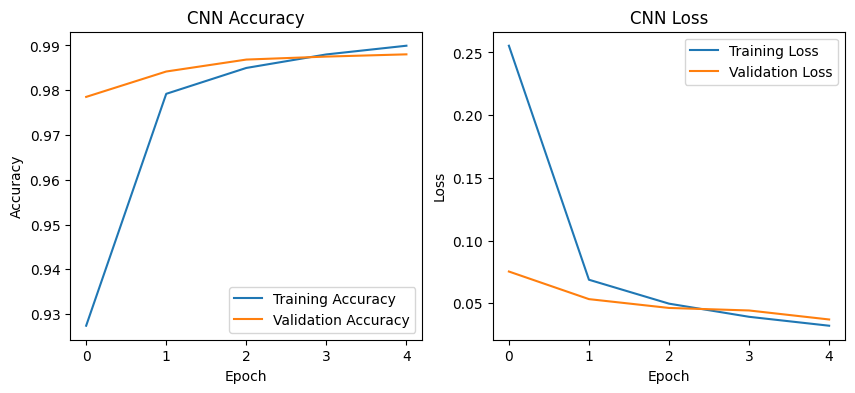

Test accuracy (CNN): 0.9868000149726868


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


x_train_cnn = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test_cnn = x_test.reshape(-1,28,28,1).astype('float32')/255.0


model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1, batch_size=128)


# Plot history
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluasi pada test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print('Test accuracy (CNN):', test_acc)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 97ms/step - accuracy: 0.8341 - loss: 0.5470 - val_accuracy: 0.9820 - val_loss: 0.0561
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9806 - loss: 0.0630 - val_accuracy: 0.9868 - val_loss: 0.0466
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.9881 - loss: 0.0399 - val_accuracy: 0.9897 - val_loss: 0.0388
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9901 - loss: 0.0304 - val_accuracy: 0.9910 - val_loss: 0.0343
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9880 - val_loss: 0.0376


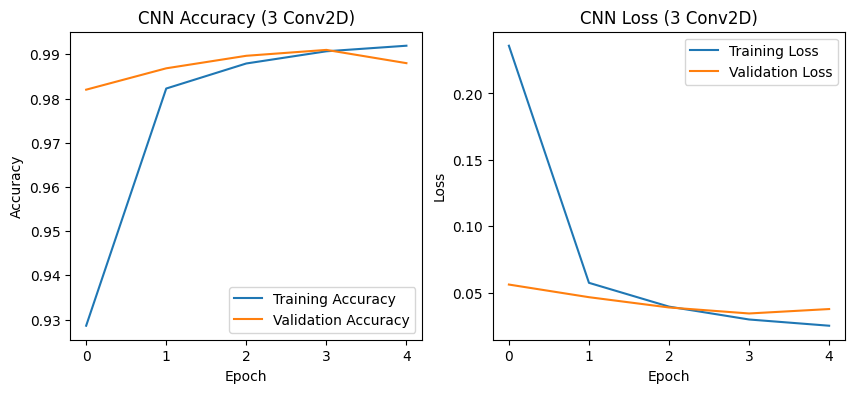

Test accuracy (CNN dengan tambahan Conv2D): 0.9887999892234802


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Preprocess data
x_train_cnn = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test_cnn  = x_test.reshape(-1,28,28,1).astype('float32')/255.0

# Bangun model CNN dengan tambahan Conv2D
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),   # tambahan Conv2D
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train_cnn, y_train,
                    epochs=5,
                    validation_split=0.1,
                    batch_size=128,
                    verbose=1)

# Plot history
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy (3 Conv2D)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss (3 Conv2D)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluasi pada test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print('Test accuracy (CNN dengan tambahan Conv2D):', test_acc)


D4

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.3592 - loss: 1.7638 - val_accuracy: 0.5154 - val_loss: 1.3622
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.5480 - loss: 1.2925 - val_accuracy: 0.5844 - val_loss: 1.2013
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.5938 - loss: 1.1646 - val_accuracy: 0.6090 - val_loss: 1.1284
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.6197 - loss: 1.0968 - val_accuracy: 0.6220 - val_loss: 1.0974
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.6362 - loss: 1.0483 - val_accuracy: 0.6374 - val_loss: 1.0560
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6531 - loss: 0.9997 - val_accuracy: 0.6464 - val_loss: 1.0512
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6641 - loss: 0.9664 - val_accuracy: 0.6524 - val_loss: 1.0073
Epoch 8/10
1407/1407 ━━

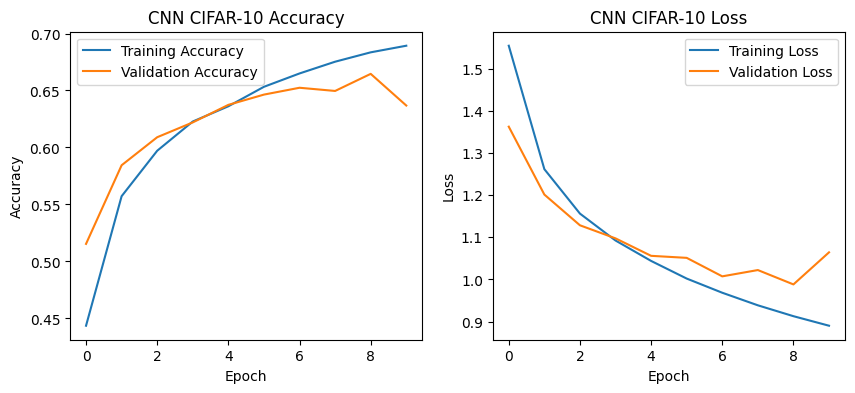

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.3344 - loss: 1.8144 - val_accuracy: 0.5298 - val_loss: 1.3463
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.5322 - loss: 1.3293 - val_accuracy: 0.5280 - val_loss: 1.3161
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.5739 - loss: 1.2035 - val_accuracy: 0.5924 - val_loss: 1.1599
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6111 - loss: 1.1134 - val_accuracy: 0.6152 - val_loss: 1.1107
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.6351 - loss: 1.0523 - val_accuracy: 0.6280 - val_loss: 1.0555
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.6488 - loss: 1.0106 - val_accuracy: 0.6336 - val_loss: 1.0553
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.6545 - loss: 0.9899 - val_accuracy: 0.6582 - val_loss: 1.0003
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.6705 -

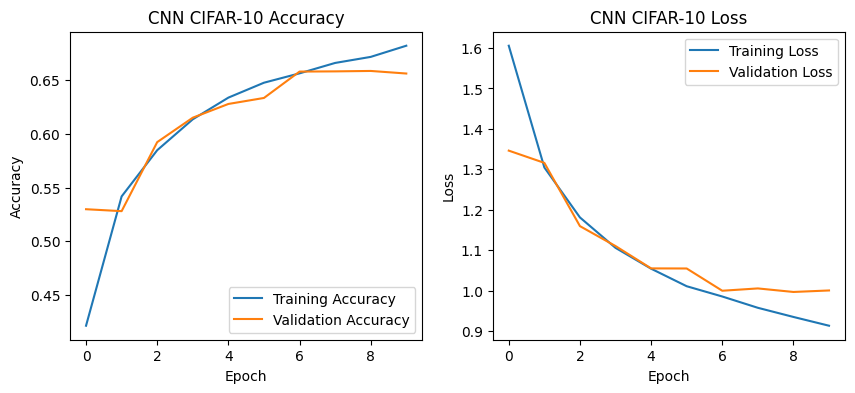

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0,5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


D5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 534s 379ms/step - accuracy: 0.4547 - loss: 1.5557 - val_accuracy: 0.5544 - val_loss: 1.2504
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 586s 396ms/step - accuracy: 0.5759 - loss: 1.2116 - val_accuracy: 0.5832 - val_loss: 1.1842
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 526s 370ms/step - accuracy: 0.6045 - loss: 1.1410 - val_accuracy: 0.5984 - val_loss: 1.1351
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 520s 370ms/step - accuracy: 0.6154 - loss: 1.1009 - val_accuracy: 0.6128 - val_loss: 1.1287
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 562s 370ms/step - accuracy: 0.6271 - loss: 1.0614 - val_accuracy: 0.6088 - val_loss: 1.1124


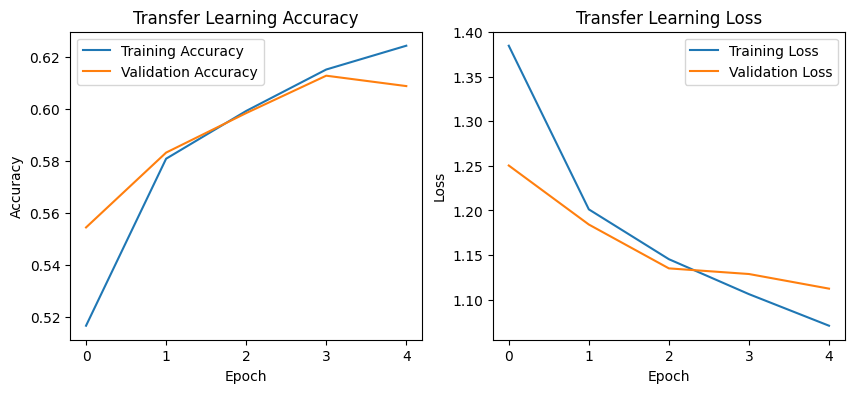

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False,  input_shape=(32,32,3))
base_model.trainable = False
model = models.Sequential([
 base_model,
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1732s 2s/step - accuracy: 0.3078 - loss: 1.8276 - val_accuracy: 0.6692 - val_loss: 0.9840
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1765s 2s/step - accuracy: 0.6990 - loss: 0.8841 - val_accuracy: 0.7230 - val_loss: 0.8052
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1727s 2s/step - accuracy: 0.7485 - loss: 0.7262 - val_accuracy: 0.7254 - val_loss: 0.7912
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1704s 2s/step - accuracy: 0.7828 - loss: 0.6290 - val_accuracy: 0.7348 - val_loss: 0.7799
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1818s 2s/step - accuracy: 0.8017 - loss: 0.5640 - val_accuracy: 0.7496 - val_loss: 0.7540
Akurasi pada data test: 0.7417


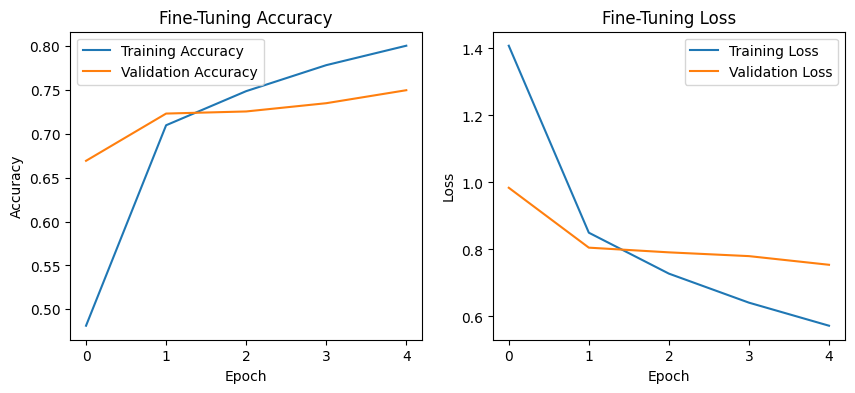

In [ ]:
# === Import library ===
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10

# === Load dataset CIFAR-10 ===
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# === Bangun base model VGG16 ===
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Fine-tuning: aktifkan hanya 4 layer terakhir
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# === Bangun model dengan classifier baru ===
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === Compile ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Training ===
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.1,
                    batch_size=64,
                    verbose=1)

# === Evaluasi pada data test ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Akurasi pada data test: {test_acc:.4f}")

# === Plot history ===
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 333ms/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.76      0.88      0.81      1000
           2       0.73      0.65      0.69      1000
           3       0.59      0.56      0.58      1000
           4       0.65      0.75      0.70      1000
           5       0.69      0.59      0.64      1000
           6       0.74      0.80      0.77      1000
           7       0.83      0.77      0.80      1000
           8       0.80      0.89      0.84      1000
           9       0.85      0.72      0.78      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



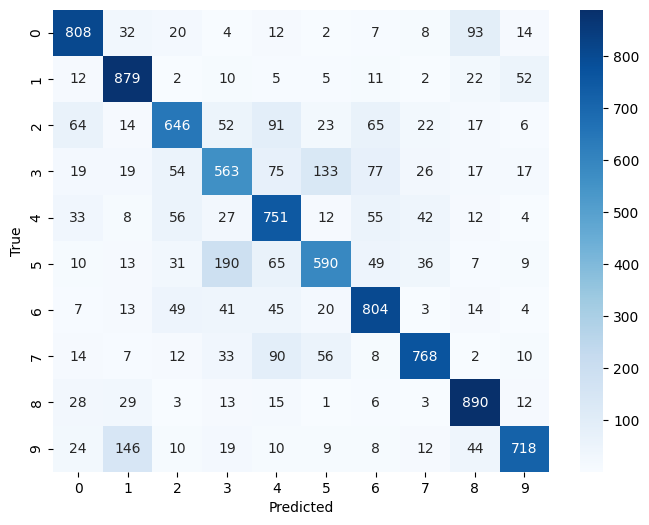

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


F. PENUGASAN

In [ ]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit jadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]
    return canvas, arr


Saving Screenshot 2025-09-20 162202.png to Screenshot 2025-09-20 162202.png


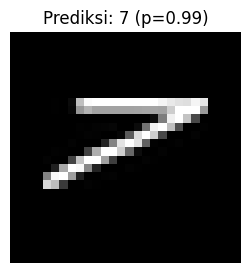

Rekap Prediksi (CNN):
- Screenshot 2025-09-20 162202.png -> 7 (p=0.990)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    # disp: gambar PIL untuk ditampilkan, x: array (28,28,1)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    # Tambahkan batch dimensi -> (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi dengan CNN MNIST
    probs = model.predict(x_batch, verbose=0)[0]  # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap hasil ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")